# project about NBA stat

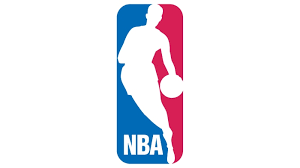

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, mean_squared_error

In [2]:
url='https://github.com/eytanmuzafi/data-science/raw/main/nba_team_stats_00_to_21.csv'
nba_stat= pd.read_csv(url)

## Checking data problems

In [3]:
nba_stat.isnull().sum()

teamstatspk    0
TEAM           0
GP             0
W              0
L              0
WIN%           0
MIN            0
PTS            0
FGM            0
FGA            0
FG%            0
3PM            0
3PA            0
3P%            0
FTM            0
FTA            0
FT%            0
OREB           0
DREB           0
REB            0
AST            0
TOV            0
STL            0
BLK            0
BLKA           0
PF             0
PFD            0
+/-            0
SEASON         0
dtype: int64

In [4]:
nba_stat.dtypes

teamstatspk      int64
TEAM            object
GP               int64
W                int64
L                int64
WIN%           float64
MIN            float64
PTS            float64
FGM            float64
FGA            float64
FG%            float64
3PM            float64
3PA            float64
3P%            float64
FTM            float64
FTA            float64
FT%            float64
OREB           float64
DREB           float64
REB            float64
AST            float64
TOV            float64
STL            float64
BLK            float64
BLKA           float64
PF             float64
PFD            float64
+/-            float64
SEASON          object
dtype: object

SEASON היא אובייקט.

נעדיף לא לשנות אותו לסוג דייט טיים כדי להשאיר את זה בצורה הזאת, כי עונה מתפרסת על שני חצאי שנה ולא על שנה מלאה.

In [5]:
len(nba_stat)

626

ראינו שמספר השורות לא מתחלק בשלושים, וידוע לנו שבכל עונה צריכות להיות שלושים קבוצות.

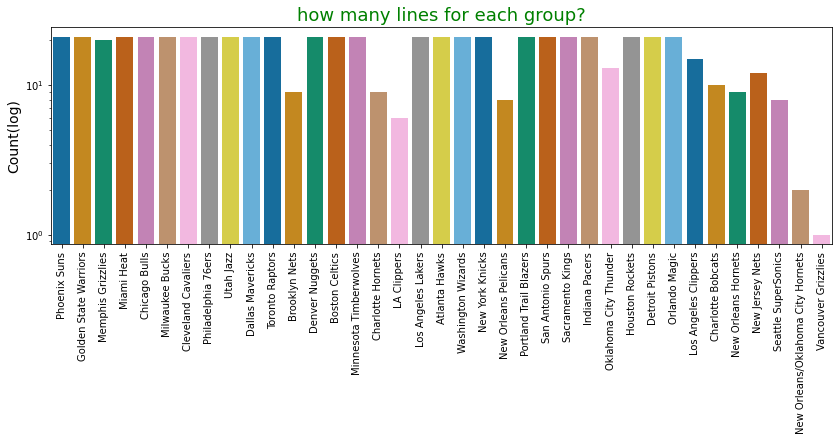

In [6]:
plt.figure(figsize=(14,4)) 
ax=sns.countplot( x = 'TEAM', data = nba_stat,palette="colorblind")
ax.set_yscale("log")
ax.tick_params(axis='x', labelrotation=90)
ax.set_ylabel("Count(log)",fontsize=14)
ax.set_xlabel("")
ax.set_title("how many lines for each group?",color='green',fontsize=18);

ידוע לנו שמספר הקבוצות צריך להיות 30. יש קבוצות שהחליפו את שמם, אז נשנה בהתאם.

In [7]:
nba_stat.set_index('TEAM', inplace=True)
nba_stat.rename(index = {"LA Clippers": "Los Angeles Clippers",
                     "Seattle SuperSonics":"Oklahoma City Thunder","New Jersey Nets": "Brooklyn Nets",
                     "Charlotte Bobcats":"Charlotte Hornets","New Orleans Hornets": "New Orleans Pelicans","New Orleans/Oklahoma City Hornets": "New Orleans Pelicans"},
                                 inplace = True)

In [8]:
nba_stat=nba_stat.reset_index()

In [9]:
len(nba_stat.TEAM.unique())

31

בדקנו באינטרנט ומצאנו-
שארלוט הצטרפה בעונת  2004-5 והחליפה את ונקובר ולכן המספר לא מתחלק בשלושים.
לכן נוריד את העונות עד שהיא הצטרפה.


In [10]:
nba_stat=nba_stat[nba_stat['SEASON']>='2004-05'].copy()
len(nba_stat)

510

In [11]:
nba_stat.groupby('TEAM')[['SEASON']].count()

,SEASON
TEAM,
Atlanta Hawks,17
Boston Celtics,17
Brooklyn Nets,17
Charlotte Hornets,17
Chicago Bulls,17
Cleveland Cavaliers,17
Dallas Mavericks,17
Denver Nuggets,17
Detroit Pistons,17


חסרה עמודה של קליעות לשתיים. ניצור אחת כזאת כדי שיהיה יותר נוח ונוריד עמודות מיותרות.

In [12]:
nba_stat['FGM']=nba_stat['FGM']-nba_stat['3PM']
nba_stat['FGA']=nba_stat['FGA']-nba_stat['3PA']
nba_stat = nba_stat.rename(columns={'FGM':'2PM','FGA':'2PA'})
nba_stat['FG%']=nba_stat['2PM']/nba_stat['2PA']
nba_stat = nba_stat.rename(columns={'FG%':'2P%'})

In [13]:
nba_stat.drop(labels='teamstatspk',axis=1,inplace=True)

In [14]:
nba_stat.columns

Index(['TEAM', 'GP', 'W', 'L', 'WIN%', 'MIN', 'PTS', '2PM', '2PA', '2P%',
       '3PM', '3PA', '3P%', 'FTM', 'FTA', 'FT%', 'OREB', 'DREB', 'REB', 'AST',
       'TOV', 'STL', 'BLK', 'BLKA', 'PF', 'PFD', '+/-', 'SEASON'],
      dtype='object')

נבדוק אם יש חריגות בתחומים בכל קטגוריה

In [15]:
features = ['TEAM', 'GP', 'W', 'L', 'WIN%', 'MIN', 'PTS', '2PM',
       '2PA', '2P%', '3PM', '3PA', '3P%', 'FTM', 'FTA', 'FT%', 'OREB', 'DREB',
       'REB', 'AST', 'TOV', 'STL', 'BLK', 'BLKA', 'PF', 'PFD', '+/-']
melted_nba_stat= pd.melt(nba_stat[features], id_vars = 'TEAM', value_vars = features)

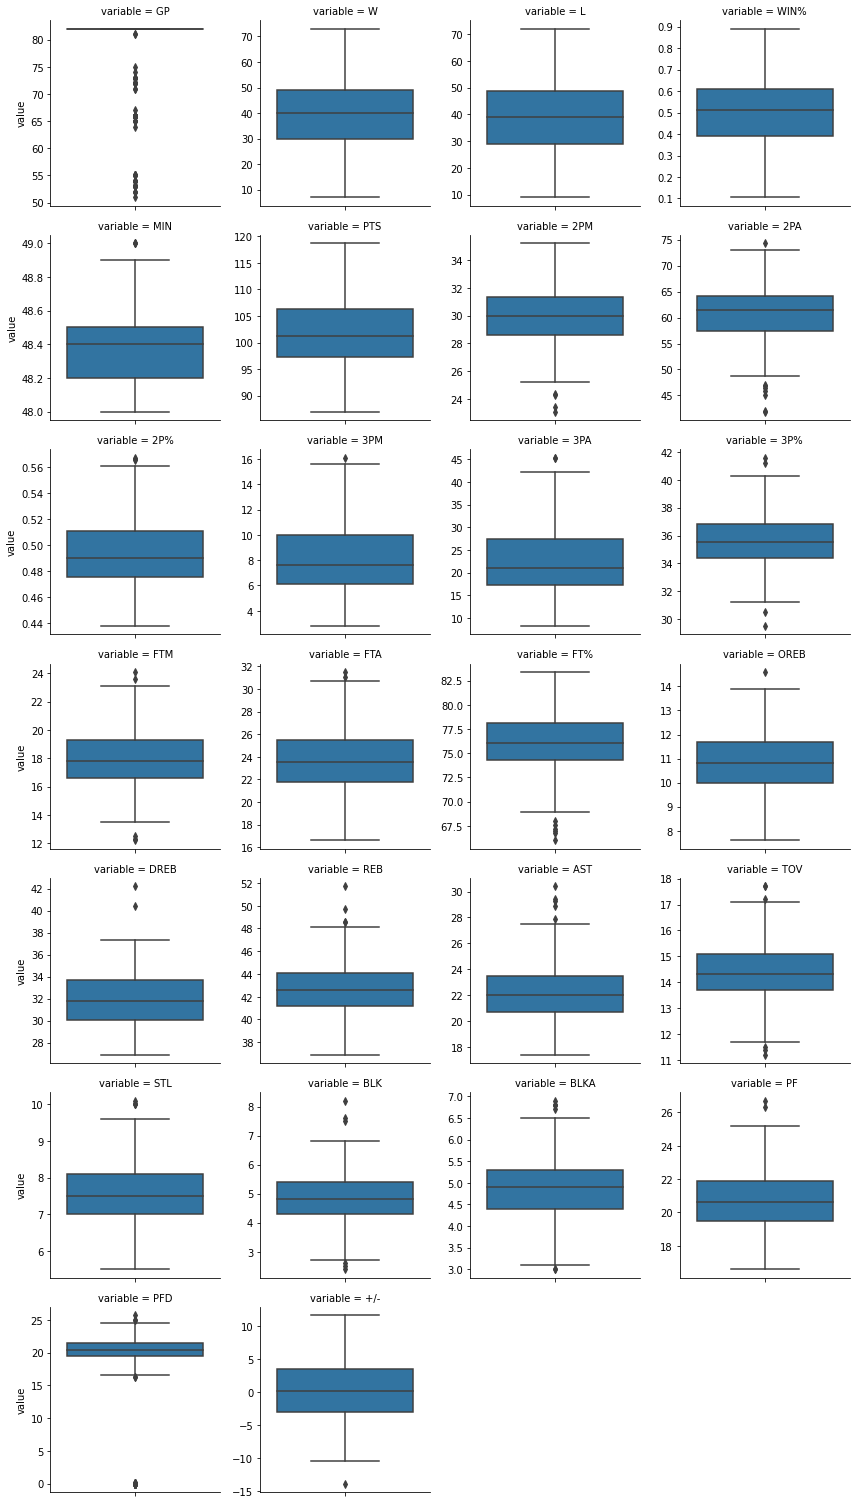

In [16]:
ans = sns.FacetGrid(data = melted_nba_stat, col="variable",  col_wrap=4,sharey=False)
ans.map_dataframe(sns.boxplot, y = 'value');

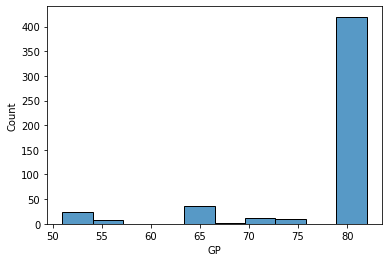

In [17]:
sns.histplot( x = 'GP', data = nba_stat);

במדד זה קיימת חריגה בגלל שבעונה האחרונה שוחקו פחות משחקים בגלל הקורונה. לכן בכל החישובים נעשה בדיקה לפי אחוזי נצחונות

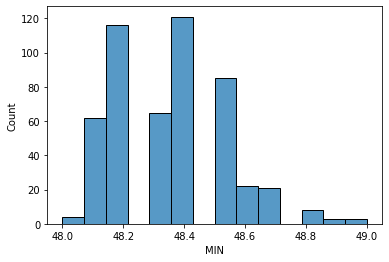

In [18]:
sns.histplot( x = 'MIN', data = nba_stat);

למרות שיש בכל משחק 48 דקות, יש משחקים עם יותר בגלל הארכות וזה גם כן בסדר.

נוריד את שתיהן כי אין בהן נתונים מעניינים

In [19]:
nba_stat.drop(labels=['MIN','GP'],axis=1,inplace=True)

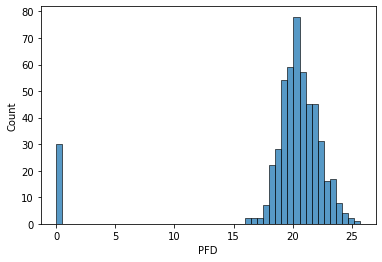

In [20]:
sns.histplot( x = 'PFD', data = nba_stat);

In [21]:
nba_stat[nba_stat.PFD==0]

,TEAM,W,L,WIN%,PTS,2PM,2PA,2P%,3PM,3PA,...,REB,AST,TOV,STL,BLK,BLKA,PF,PFD,+/-,SEASON
480,Phoenix Suns,62,20,0.756,110.4,31.2,60.9,0.512315,9.7,24.7,...,44.1,23.5,13.7,7.0,5.5,4.2,19.1,0.0,7.1,2004-05
481,Miami Heat,59,23,0.720,101.5,32.0,62.3,0.513644,5.8,15.4,...,43.0,21.8,13.7,6.4,5.8,3.2,22.1,0.0,6.5,2004-05
482,San Antonio Spurs,59,23,0.720,96.2,29.4,61.7,0.476499,6.2,17.0,...,42.4,21.6,13.7,7.5,6.6,5.1,20.9,0.0,7.8,2004-05
483,Dallas Mavericks,58,24,0.707,102.5,31.7,66.1,0.479576,5.6,15.5,...,42.9,19.6,13.4,8.6,5.6,4.9,22.3,0.0,5.7,2004-05
484,Detroit Pistons,54,28,0.659,93.3,30.4,65.5,0.464122,4.4,12.8,...,43.4,21.8,13.8,7.0,6.1,4.5,20.0,0.0,3.9,2004-05
486,Houston Rockets,51,31,0.622,95.1,28.0,59.8,0.468227,6.7,18.5,...,42.4,21.1,13.8,6.9,4.6,4.1,22.0,0.0,4.0,2004-05
487,Sacramento Kings,50,32,0.610,103.7,32.7,68.1,0.480176,6.4,17.0,...,42.4,24.5,13.1,8.2,3.9,4.5,20.5,0.0,2.2,2004-05
490,Boston Celtics,45,37,0.549,101.3,31.8,64.1,0.496100,5.3,15.3,...,40.8,22.1,15.8,8.1,5.2,4.9,24.4,0.0,0.9,2004-05
491,Memphis Grizzlies,45,37,0.549,93.4,27.7,58.4,0.474315,6.5,18.1,...,39.0,20.9,14.6,8.5,5.8,5.8,23.3,0.0,2.3,2004-05
492,Washington Wizards,45,37,0.549,100.5,29.9,64.6,0.462848,6.3,18.3,...,42.8,19.1,14.3,8.7,4.2,5.0,22.0,0.0,-0.3,2004-05


מדובר על עונה אחת. אם נרצה להשתמש בעמודה זו נזכור שיש בה חריגה ונטפל בהתאם לשימוש בה.

In [22]:
nba_stat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 0 to 509
Data columns (total 26 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TEAM    510 non-null    object 
 1   W       510 non-null    int64  
 2   L       510 non-null    int64  
 3   WIN%    510 non-null    float64
 4   PTS     510 non-null    float64
 5   2PM     510 non-null    float64
 6   2PA     510 non-null    float64
 7   2P%     510 non-null    float64
 8   3PM     510 non-null    float64
 9   3PA     510 non-null    float64
 10  3P%     510 non-null    float64
 11  FTM     510 non-null    float64
 12  FTA     510 non-null    float64
 13  FT%     510 non-null    float64
 14  OREB    510 non-null    float64
 15  DREB    510 non-null    float64
 16  REB     510 non-null    float64
 17  AST     510 non-null    float64
 18  TOV     510 non-null    float64
 19  STL     510 non-null    float64
 20  BLK     510 non-null    float64
 21  BLKA    510 non-null    float64
 22  PF

## Looking for correlations

נבדוק איזה סוג ההתלפגות כדי לדעת באזיה מקדם מתאם להשתמש

In [23]:
features = ['TEAM', 'WIN%','PTS', '2PM','2PA', '2P%', '3PM',
        '3PA', '3P%','FTM', 'FTA', 'FT%', 'OREB', 'DREB',
       'REB', 'AST', 'TOV', 'STL', 'BLK', 'BLKA', 'PF', 'PFD', '+/-']
melted_nba_stat_corr= pd.melt(nba_stat[features], id_vars = 'TEAM', value_vars = features)

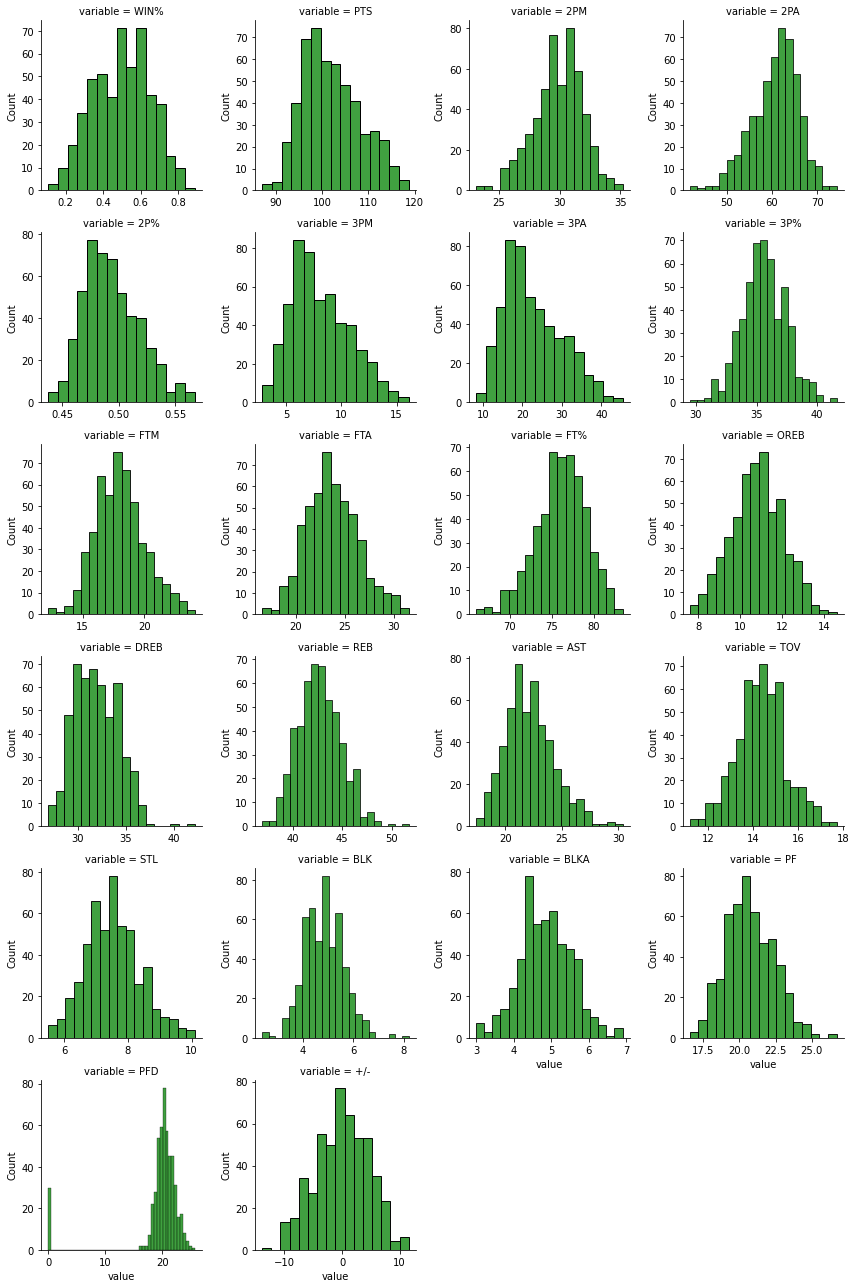

In [72]:
ans = sns.FacetGrid(data = melted_nba_stat_corr, col="variable",  col_wrap=4,sharey=False,sharex=False)
ans.map_dataframe(sns.histplot, x = 'value',color = 'green');

In [25]:
nba_stat_cut=nba_stat[['TEAM', 'WIN%', 'PTS', '2PM',
       '2PA', '2P%', '3PM', '3PA', '3P%', 'FTM','FTA', 'FT%','REB', 'AST','BLK', 'BLKA', 'PF', 'PFD', '+/-']]

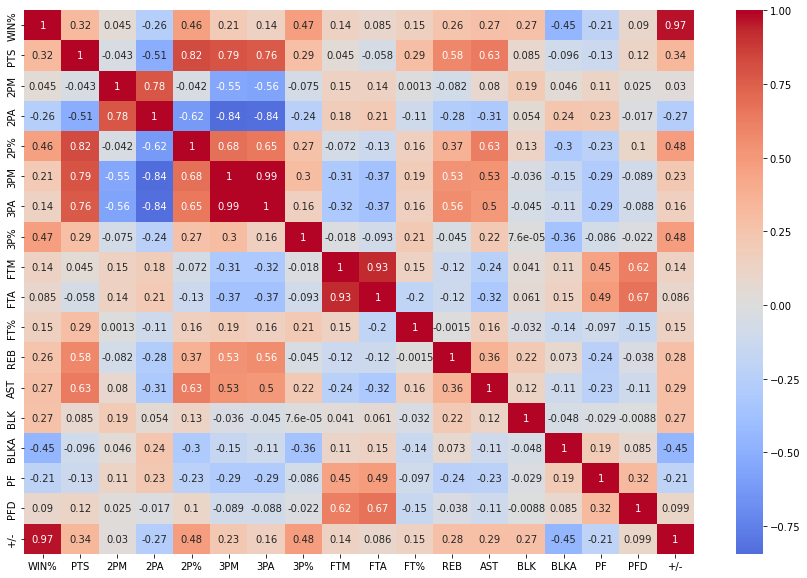

In [26]:
corrs = nba_stat_cut.corr(method = 'spearman')
plt.figure(figsize=(15,10)) 
sns.heatmap(corrs, cmap='coolwarm', center=0, annot = True);

היינו מצפים שיהיה מתאם יותר גבוה בין קליעה לנצחון ככל שהקליעה שווה יותר נקודות. אבל להפתעתנו רואים כי דווקא יש מתאם דומה בין אחוזי קליעה לשתיים ונצחונות, לבין אחוזי קליעה לשלוש ונצחונות.
מעניין לבדוק אם יש שינוי בין תקופות בליגה.

### 

### 1 מסקנה
#### ניתן לראות כי עם השנים ישנה עליה במתאם בין אחוזים לשלוש ונצחונות, ובמקביל ירידה במתאם בין אחוזים לשתיים ונצחנות. נתון זה מצביע על שינוי באופי המשחק, עם השנים קבוצות יותר תלויות בזריקות משלוש כדי לנצח.

##### בדיקה איזה תקופות דומות 

<AxesSubplot:>

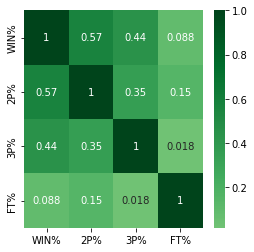

In [27]:
nba_2004=nba_stat[(nba_stat['SEASON']=='2004-05')] 
corrs = nba_2004[['WIN%','2P%','3P%','FT%']].corr(method = 'spearman')
plt.figure(figsize=(4,4)) 
sns.heatmap(corrs, cmap='Greens', center=0, annot = True)

<AxesSubplot:>

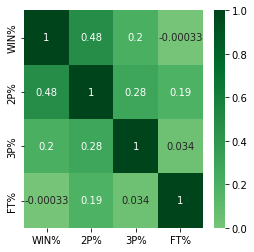

In [28]:
nba_2005=nba_stat[(nba_stat['SEASON']=='2005-06')] 
corrs = nba_2005[['WIN%','2P%','3P%','FT%']].corr(method = 'spearman')
plt.figure(figsize=(4,4)) 
sns.heatmap(corrs, cmap='Greens', center=0, annot = True)

<AxesSubplot:>

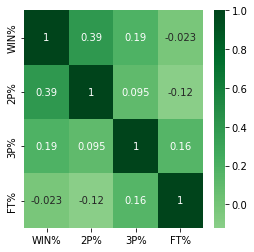

In [29]:
nba_2006=nba_stat[(nba_stat['SEASON']=='2006-07')] 
corrs = nba_2006[['WIN%','2P%','3P%','FT%']].corr(method = 'spearman')
plt.figure(figsize=(4,4)) 
sns.heatmap(corrs, cmap='Greens', center=0, annot = True)

<AxesSubplot:>

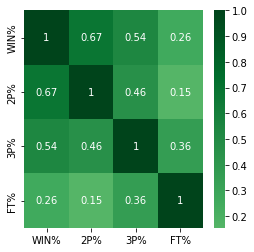

In [30]:
nba_2007=nba_stat[(nba_stat['SEASON']=='2007-08')] 
corrs = nba_2007[['WIN%','2P%','3P%','FT%']].corr(method = 'spearman')
plt.figure(figsize=(4,4)) 
sns.heatmap(corrs, cmap='Greens', center=0, annot = True)

<AxesSubplot:>

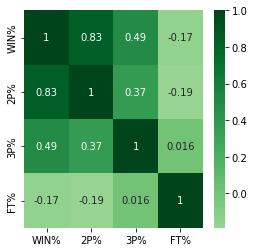

In [31]:
nba_2008=nba_stat[(nba_stat['SEASON']=='2008-09')] 
corrs = nba_2008[['WIN%','2P%','3P%','FT%']].corr(method = 'spearman')
plt.figure(figsize=(4,4)) 
sns.heatmap(corrs, cmap='Greens', center=0, annot = True)

<AxesSubplot:>

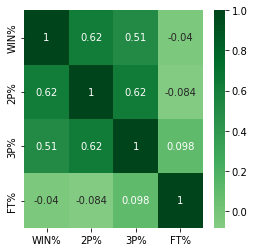

In [32]:
nba_2009=nba_stat[(nba_stat['SEASON']=='2009-10')]
corrs = nba_2009[['WIN%','2P%','3P%','FT%']].corr(method = 'spearman')
plt.figure(figsize=(4,4)) 
sns.heatmap(corrs, cmap='Greens', center=0, annot = True)

<AxesSubplot:>

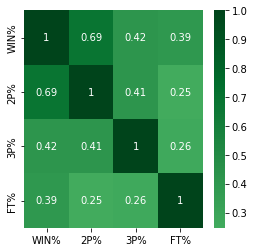

In [33]:
nba_2010=nba_stat[(nba_stat['SEASON']=='2010-11')] 
corrs = nba_2010[['WIN%','2P%','3P%','FT%']].corr(method = 'spearman')
plt.figure(figsize=(4,4)) 
sns.heatmap(corrs, cmap='Greens', center=0, annot = True)

<AxesSubplot:>

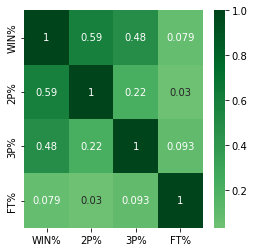

In [34]:
nba_2011=nba_stat[(nba_stat['SEASON']=='2011-12')] 
corrs = nba_2011[['WIN%','2P%','3P%','FT%']].corr(method = 'spearman')
plt.figure(figsize=(4,4)) 
sns.heatmap(corrs, cmap='Greens', center=0, annot = True)

<AxesSubplot:>

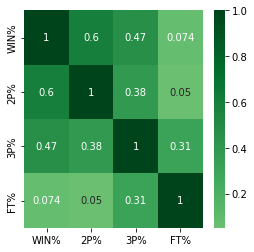

In [35]:
nba_2012=nba_stat[(nba_stat['SEASON']=='2012-13')] 
corrs = nba_2012[['WIN%','2P%','3P%','FT%']].corr(method = 'spearman')
plt.figure(figsize=(4,4)) 
sns.heatmap(corrs, cmap='Greens', center=0, annot = True)

<AxesSubplot:>

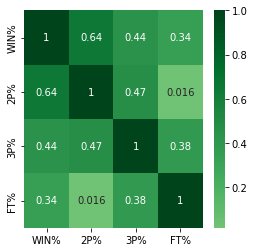

In [36]:
nba_2013=nba_stat[(nba_stat['SEASON']=='2013-14')] 
corrs = nba_2013[['WIN%','2P%','3P%','FT%']].corr(method = 'spearman')
plt.figure(figsize=(4,4)) 
sns.heatmap(corrs, cmap='Greens', center=0, annot = True)

<AxesSubplot:>

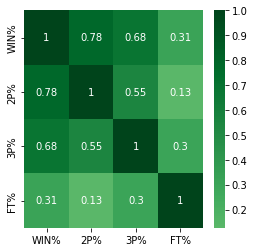

In [37]:
nba_2014=nba_stat[(nba_stat['SEASON']=='2014-15')] 
corrs = nba_2014[['WIN%','2P%','3P%','FT%']].corr(method = 'spearman')
plt.figure(figsize=(4,4)) 
sns.heatmap(corrs, cmap='Greens', center=0, annot = True)

<AxesSubplot:>

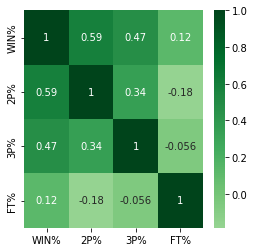

In [38]:
nba_2015=nba_stat[(nba_stat['SEASON']=='2015-16')] 
corrs = nba_2015[['WIN%','2P%','3P%','FT%']].corr(method = 'spearman')
plt.figure(figsize=(4,4)) 
sns.heatmap(corrs, cmap='Greens', center=0, annot = True)

<AxesSubplot:>

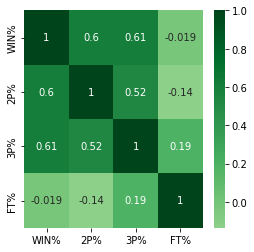

In [39]:
nba_2016=nba_stat[(nba_stat['SEASON']=='2016-17')] 
corrs = nba_2016[['WIN%','2P%','3P%','FT%']].corr(method = 'spearman')
plt.figure(figsize=(4,4)) 
sns.heatmap(corrs, cmap='Greens', center=0, annot = True)

<AxesSubplot:>

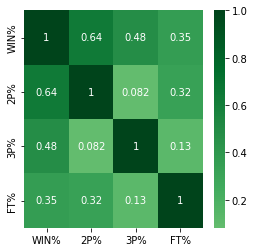

In [40]:
nba_2017=nba_stat[(nba_stat['SEASON']=='2017-18')] 
corrs = nba_2017[['WIN%','2P%','3P%','FT%']].corr(method = 'spearman')
plt.figure(figsize=(4,4)) 
sns.heatmap(corrs, cmap='Greens', center=0, annot = True)

<AxesSubplot:>

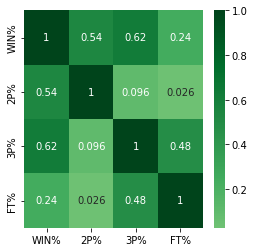

In [41]:
nba_2018=nba_stat[(nba_stat['SEASON']=='2018-19')] 
corrs = nba_2018[['WIN%','2P%','3P%','FT%']].corr(method = 'spearman')
plt.figure(figsize=(4,4)) 
sns.heatmap(corrs, cmap='Greens', center=0, annot = True)

<AxesSubplot:>

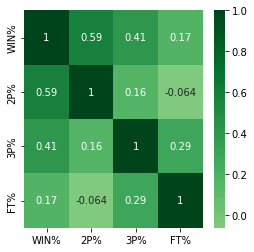

In [42]:
nba_2019=nba_stat[(nba_stat['SEASON']=='2019-20')] 
corrs = nba_2019[['WIN%','2P%','3P%','FT%']].corr(method = 'spearman')
plt.figure(figsize=(4,4)) 
sns.heatmap(corrs, cmap='Greens', center=0, annot = True)

<AxesSubplot:>

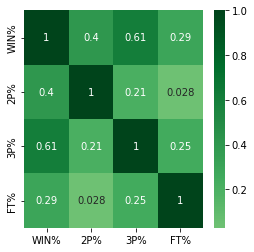

In [43]:
nba_2020=nba_stat[(nba_stat['SEASON']=='2020-21')] 
corrs = nba_2020[['WIN%','2P%','3P%','FT%']].corr(method = 'spearman')
plt.figure(figsize=(4,4)) 
sns.heatmap(corrs, cmap='Greens', center=0, annot = True)

In [44]:
corr_2p_df = {'SEASON': ['2004','2005','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015','2016','2017','2018','2019','2020'],'corr':[0.57,0.48,0.39,0.67,0.83,0.62,0.69,0.59,0.6,0.64,0.78,0.59,0.6,0.64,0.54,0.59,0.4]}
corr_2p_df = pd.DataFrame(data=corr_2p_df)

In [45]:
corr_3p_df = {'SEASON': ['2004','2005','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015','2016','2017','2018','2019','2020'],'corr':[0.44,0.2,0.19,0.54,0.49,0.51,0.42,0.48,0.47,0.44,0.68,0.47,0.61,0.48,0.62,0.41,0.61]}
corr_3p_df = pd.DataFrame(data=corr_3p_df)

<AxesSubplot:xlabel='SEASON', ylabel='corr'>

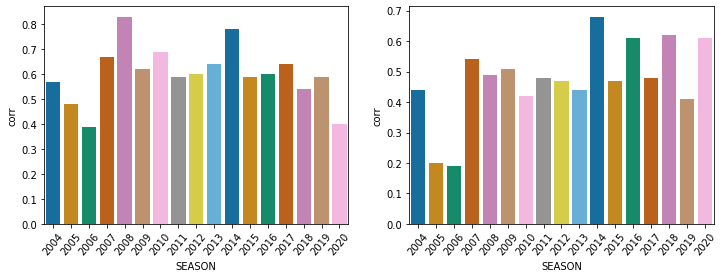

In [46]:
fig, axes = plt.subplots(1,2,figsize=(12,4))
axes[0].tick_params(axis='x', labelrotation=50)
axes[1].tick_params(axis='x', labelrotation=50)
sns.barplot(data=corr_2p_df,x='SEASON',y='corr',ax=axes[0],palette="colorblind")
sns.barplot(data=corr_3p_df,x='SEASON',y='corr',ax=axes[1],palette="colorblind")

##### התקופות המצומצמות שמהן נסיק את המסקנה

<AxesSubplot:>

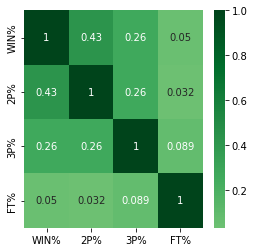

In [47]:
nba_to_2006=nba_stat[nba_stat['SEASON']<='2006-07']
corrs = nba_to_2006[['WIN%','2P%','3P%','FT%']].corr(method = 'spearman')
plt.figure(figsize=(4,4)) 
sns.heatmap(corrs, cmap='Greens', center=0, annot = True)

<AxesSubplot:>

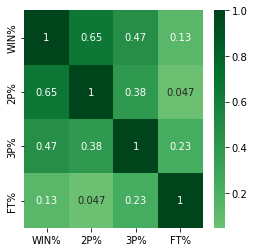

In [48]:
nba_from_2007_to_2013=nba_stat[(nba_stat['SEASON']>='2007-08') & (nba_stat['SEASON']<='2013-14')]
corrs = nba_from_2007_to_2013[['WIN%','2P%','3P%','FT%']].corr(method = 'spearman')
plt.figure(figsize=(4,4)) 
sns.heatmap(corrs, cmap='Greens', center=0, annot = True)

<AxesSubplot:>

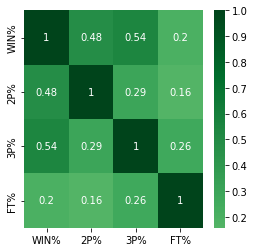

In [49]:
nba_from_2014=nba_stat[(nba_stat['SEASON']>='2014-15')]
corrs = nba_from_2014[['WIN%','2P%','3P%','FT%']].corr(method = 'spearman')
plt.figure(figsize=(4,4)) 
sns.heatmap(corrs, cmap='Greens', center=0, annot = True)

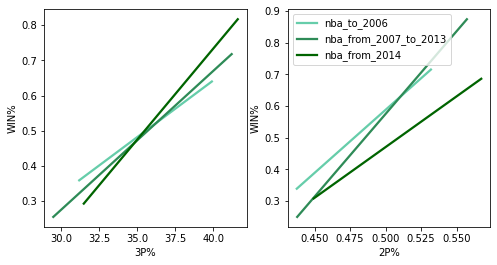

In [50]:
fig, ax= plt.subplots(figsize=(8, 4),ncols=2)
sns.regplot(x='3P%', y='WIN%', data=nba_to_2006, fit_reg=True, ci=None, ax=ax[0], label='nba_to_2006',scatter=False, color='mediumaquamarine')
sns.regplot(x='3P%', y='WIN%', data=nba_from_2007_to_2013, fit_reg=True, ci=None, ax=ax[0], label='nba_from_2007_to_2013',scatter=False, color='seagreen')
sns.regplot(x='3P%', y='WIN%', data=nba_from_2014, fit_reg=True, ci=None, ax=ax[0], label='nba_from_2014',scatter=False,color='darkgreen')
sns.regplot(x='2P%', y='WIN%', data=nba_to_2006, fit_reg=True, ci=None, ax=ax[1], label='nba_to_2006',scatter=False, color='mediumaquamarine' )
sns.regplot(x='2P%', y='WIN%', data=nba_from_2007_to_2013, fit_reg=True, ci=None, ax=ax[1], label='nba_from_2007_to_2013',scatter=False, color='seagreen')
sns.regplot(x='2P%', y='WIN%', data=nba_from_2014, fit_reg=True, ci=None, ax=ax[1], label='nba_from_2014',scatter=False,color='darkgreen')
plt.legend()
plt.show()

In [51]:
corr_df = {'Priod':['2004-2006','2007-2013','2014-2020'],'3p_corr':[0.26,0.47,0.54],'2p_corr':[0.43,0.65,0.48]}
corr_df = pd.DataFrame(data=corr_df)
corr_df

,Priod,3p_corr,2p_corr
0,2004-2006,0.26,0.43
1,2007-2013,0.47,0.65
2,2014-2020,0.54,0.48


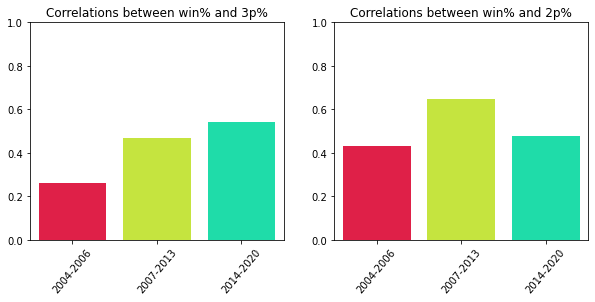

In [52]:
fig, axes = plt.subplots(1,2,figsize=(10,4))
axes[0].tick_params(axis='x', labelrotation=50)
axes[1].tick_params(axis='x', labelrotation=50)
sns.barplot(data=corr_df,x='Priod',y='3p_corr',ax=axes[0],palette='gist_ncar_r')
axes[0].set(ylim=(0, 1))
axes[0].set_title("Correlations between win% and 3p%")
axes[0].set_xlabel("")
axes[0].set_ylabel("")
sns.barplot(data=corr_df,x='Priod',y='2p_corr',ax=axes[1],palette='gist_ncar_r')
axes[1].set(ylim=(0, 1))
axes[1].set_title("Correlations between win% and 2p%")
axes[1].set_xlabel("")
axes[1].set_ylabel("")
plt.show()

בגרף האחוזים לשלוש ניתן לראות כי עם השנים השיפוע (המתאם בין אחוזי ניצחונות לאחוזי קליעה לשלוש) גדל.

מנגד- ניתן לראות כי בגרף האחוזים לשתיים השיפוע הולך וקטן עם השנים. 

## מסקנה 2 

נחפש שינויים שקורים בקטגוריות מסוימות בדאטה עם השנים, לראות מגמות שהכדורסל האמריקאי הולך אליהן.

In [53]:
features = ['SEASON','PTS', '2PM','2PA', '2P%', '3PM',
        '3PA', '3P%','FTM', 'FTA', 'FT%', 'OREB', 'DREB',
       'REB', 'AST', 'TOV', 'STL', 'BLK', 'BLKA', 'PF', 'PFD']
melt_nba_stat= pd.melt(nba_stat[features], id_vars = 'SEASON', value_vars = features)

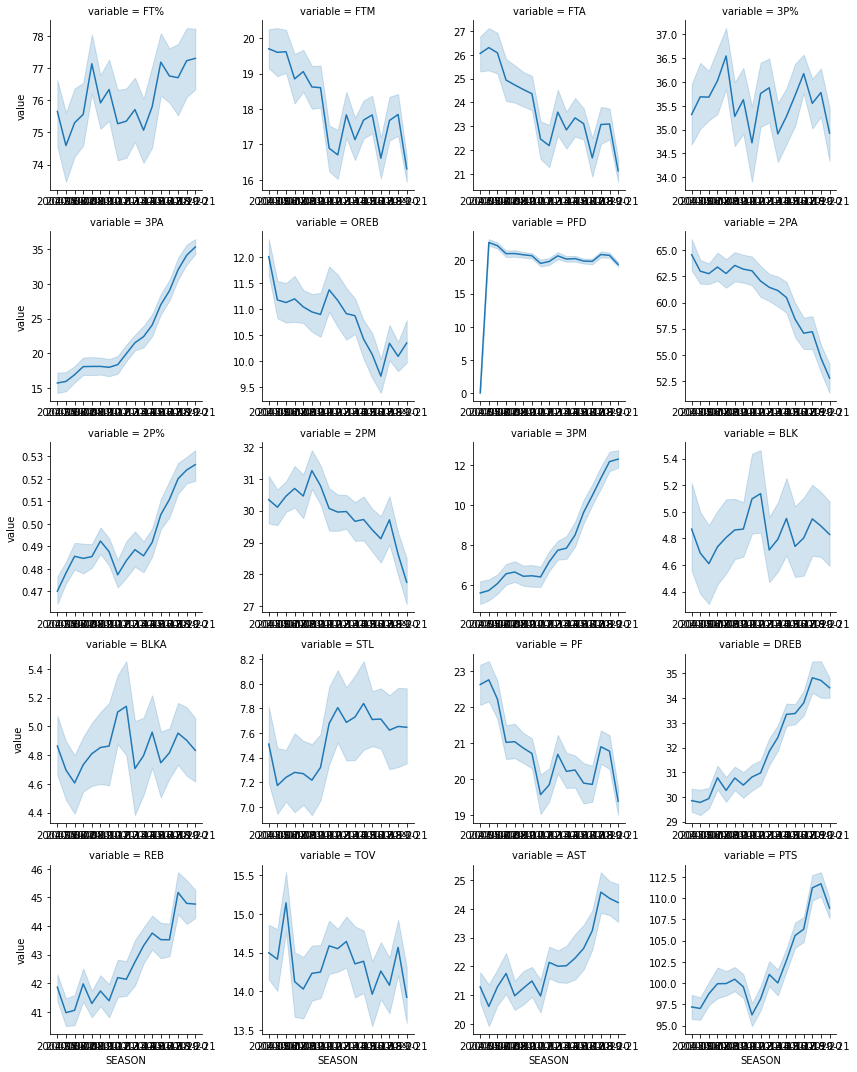

In [54]:
ans = sns.FacetGrid(data = melt_nba_stat.sort_values('SEASON'), col="variable",col_wrap=4,sharey=False,sharex=False)
ans.map_dataframe(sns.lineplot,x='SEASON', y = 'value');

רואים שבעונה הראשונה יש חריגה במדד PFD

In [55]:
nba_stat.PFD[nba_stat['SEASON']=='2004-05'].sum()

0.7

לא נתייחס אליו כמדד שיש בו שינוי כי כנראה שבעונה הרשונה לא השתמשו בו בצורה מלאה. עם השנים מכניסים מדדים חדשים לדפי הסטטיסטיקה בליגה

ניתן לראות כי ישנם מדדים מסוימים שעולים ומדדים אחרים שיורדים. ננסה למצוא קו מנחה לאיזה מדדים משתנים לאיזה כיוון ולכן ניצור מדד התקפי ומדד הגנתי

In [56]:
nba_stat['def']=nba_stat['STL']+nba_stat['BLK']+nba_stat['PF']
nba_stat['off']=nba_stat['PTS']+nba_stat['2PM']+nba_stat['3PM']+nba_stat['AST']+nba_stat['FTM']

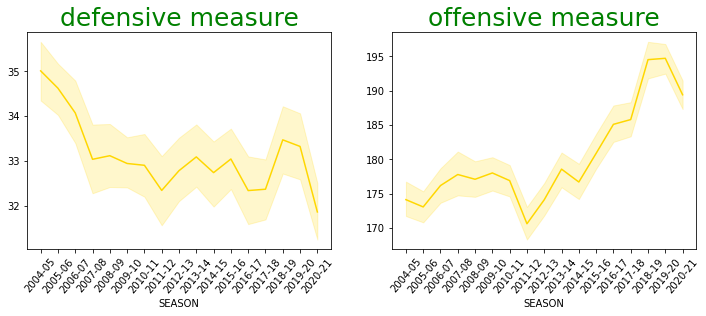

In [57]:
fig, axes = plt.subplots(1,2,figsize=(12,4))
sns.lineplot(data=nba_stat.sort_values('SEASON'),x='SEASON',y='def',ax=axes[0],color='gold')
sns.lineplot(data=nba_stat.sort_values('SEASON'),x='SEASON',y='off',ax=axes[1],color='gold')
axes[0].tick_params(axis='x', labelrotation=50)
axes[1].tick_params(axis='x', labelrotation=50)
axes[1].set_title("offensive measure",color = 'green',fontsize=25)
axes[0].set_title("defensive measure",color = 'green',fontsize=25)
axes[0].set_ylabel("")
axes[1].set_ylabel("")
plt.show()

## מסקנה 3

נחפש לראות האם יש קטגוריות מסויימות שמאפיינות את הקבוצות ברבעון העליון של הנצחונות בליגה

In [58]:
nba_stat['WIN%'].describe()

count    510.000000
mean       0.499729
std        0.152183
min        0.106000
25%        0.390000
50%        0.512000
75%        0.610000
max        0.890000
Name: WIN%, dtype: float64

In [59]:
len(nba_stat[nba_stat['WIN%']>0.61])

125

In [60]:
best_teams = nba_stat[nba_stat['WIN%']>=0.61].copy()
best_teams=best_teams.sort_values('WIN%',ascending=False)

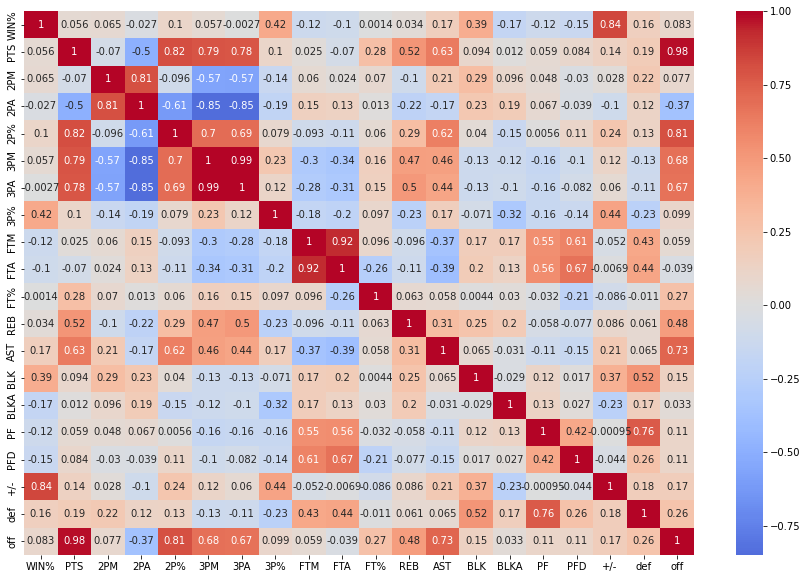

In [61]:
corrs = best_teams[['TEAM', 'WIN%', 'PTS', '2PM',
       '2PA', '2P%', '3PM', '3PA', '3P%', 'FTM','FTA', 'FT%','REB', 'AST','BLK', 'BLKA',
        'PF', 'PFD', '+/-','def','off']].corr(method = 'spearman')
plt.figure(figsize=(15,10)) 
sns.heatmap(corrs, cmap='coolwarm', center=0, annot = True);

<AxesSubplot:xlabel='3P%', ylabel='WIN%'>

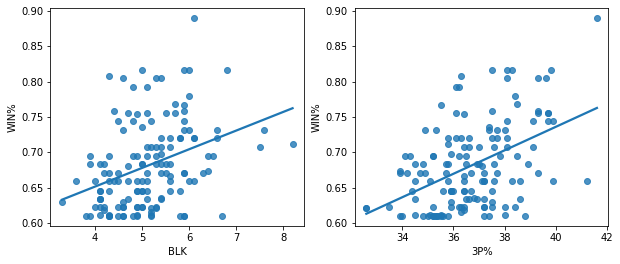

In [62]:
fig, ax= plt.subplots(1,2,figsize=(10, 4))
sns.regplot(x='BLK', y='WIN%', data=best_teams, fit_reg=True, ci=None,ax=ax[0])
sns.regplot(x='3P%', y='WIN%', data=best_teams, fit_reg=True, ci=None,ax=ax[1])

## predict

In [63]:
features = ['PTS', '2PM','2PA', '2P%', '3PM', '3PA', '3P%', 'FTM', 'FTA', 'FT%', 'OREB', 'DREB',
                      'REB', 'AST', 'TOV', 'STL', 'BLK', 'BLKA', 'PF', 'PFD', '+/-'] 
X = best_teams[features] # the features
y = best_teams['WIN%'] # the label

In [64]:
features = ['3P%'] 
X = best_teams[features] # the features
y = best_teams['WIN%'] # the label

In [65]:
X_train, X_test, y_train, y_test = sk.model_selection.train_test_split(X, y, test_size=0.2, random_state=42) 

In [66]:
my_model = DecisionTreeRegressor(max_depth=3,random_state=3)
my_model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3, random_state=3)

In [67]:
print("Making predictions for the following 5 teams:")
print(y_test.head())

print("The predictions are")
test_pred = my_model.predict(X_test.head())
print(test_pred)

Making predictions for the following 5 teams:
187    0.622
396    0.671
331    0.720
5      0.618
92     0.707
Name: WIN%, dtype: float64
The predictions are
[0.735      0.77122222 0.67950943 0.67950943 0.77122222]


In [68]:
print("Making predictions all test teams:")
print(y_test)

print("The predictions are")
test_pred = my_model.predict(X_test)
print(test_pred)

print("MSE: {:.3f}".format( mean_squared_error(y_test.values, test_pred , squared=False ) ))

Making predictions all test teams:
187    0.622
396    0.671
331    0.720
5      0.618
92     0.707
451    0.768
484    0.659
395    0.671
35     0.630
127    0.622
217    0.622
244    0.683
306    0.671
300    0.756
341    0.610
364    0.659
450    0.780
181    0.732
218    0.610
126    0.622
91     0.720
275    0.621
182    0.683
420    0.817
400    0.610
452    0.732
95     0.610
123    0.646
Name: WIN%, dtype: float64
The predictions are
[0.735      0.77122222 0.67950943 0.67950943 0.77122222 0.67950943
 0.65627273 0.65627273 0.65627273 0.67950943 0.67950943 0.65627273
 0.65627273 0.735      0.65627273 0.67950943 0.67950943 0.67950943
 0.65627273 0.735      0.65627273 0.6345     0.65627273 0.67950943
 0.65627273 0.67950943 0.67950943 0.65627273]
MSE: 0.064


In [69]:
np.std(y_test)

0.05849236824455941

In [70]:
np.std(y_train)

0.06049058579140852

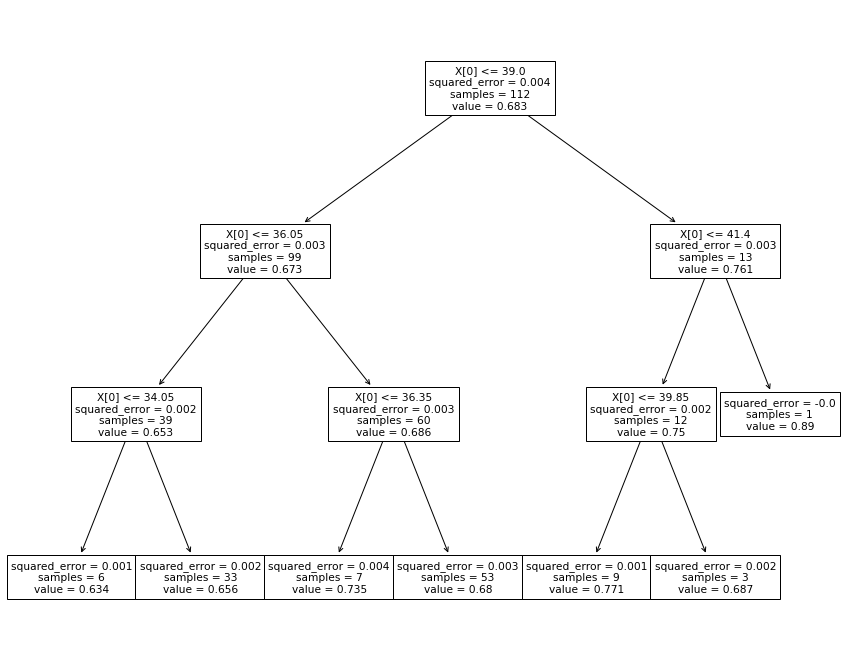

In [71]:
plt.figure(figsize=(15,12)) 
tree.plot_tree(my_model);